In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from calendar import monthrange
from datetime import timedelta
%matplotlib inline

In [9]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
# настройка графиков

# Загрузка данных и EDA

In [40]:
customers = pd.read_csv('olist_customers_dataset.csv')
# загрузка данных

In [41]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
customers.groupby('customer_unique_id', as_index=False).agg({'customer_id':'count'}).sort_values('customer_id', ascending=False)

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
orders = pd.read_csv('olist_orders_dataset.csv')
# загрузка данных

In [22]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders.value_counts('order_status')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
dtype: int64

In [28]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# 1. Определение пользователей, которые совершили покупку только один раз?

In [42]:
orders_delivered = orders[orders.order_approved_at.notna()].query("order_status == 'delivered'")

### Покупкой считаем заказ у которого есть информация об оплате и он доставлен

In [30]:
orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [32]:
orders[orders.order_approved_at.isna()].query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


### существуют заказы, которые доставлены, но инф. по оплате у них нет, такие в расчет не принимаем (возможно доставлены по ошибке, либо оплата не прошла)

In [33]:
customers_merge = customers.merge(orders_delivered, on='customer_id', how='inner')
# мержим таблицы customers и orders_delivered

In [34]:
customers_merge

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
96459,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
96460,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
96461,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
96462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [35]:
customers_1_order = customers_merge.groupby(['customer_unique_id'], as_index=False) \
.agg({'order_approved_at' : 'count'}) \
.sort_values('order_approved_at') \
.rename(columns={'order_approved_at':'count_orders'}) \
.query('count_orders == 1') \
# группируем, считаем кол-во покупок по пользователям
# оставляем пользователей, совершивших один заказ

In [36]:
customers_1_order

,customer_unique_id,count_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
61780,a9411bb77ab13d6e4bf09d0365f0dd7f,1
61779,a9403b325f6e6619eaf3cfe9af0773bd,1
61778,a93ef4ff71d0f83d54ab658ad156cd23,1
61777,a93ded3225b94e83aba36406dda9dd6f,1
...,...,...
30940,54ae160dc850008bb5c8831ac9d81669,1
30942,54b125e6a90772fd14d8f87b8207b977,1
31049,54fa5bd3c92ef6ed4857894049443b20,1
29763,5178f6720d4bdd39cbe882321a37cfd2,1


In [37]:
customers_1_order.shape[0]
# Кол-во пользователей совершивших 1 заказ

90545

### Количество пользователей, совершивших 1 заказ - 90545

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [43]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [44]:
canceled_orders = orders[orders.order_delivered_customer_date.isna()].query("order_status == 'canceled' or order_status == 'unavailable'")

### Недоставленными заказами считаем заказы, у которых отсутствует время доставки, они имеют статус отменен либо недоступен

In [45]:
canceled_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [46]:
canceled_orders['order_estimated_delivery_date'] = pd.to_datetime(canceled_orders['order_estimated_delivery_date'])
# перевод в формат даты

In [47]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
# перевод в формат даты

In [48]:
canceled_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [49]:
canceled_orders['max_delivery_date'] = canceled_orders['order_estimated_delivery_date'] + pd.Timedelta("20 day")
# на данном этапе сделано для дальнейшей конкотенации

In [50]:
canceled_orders['month'] = canceled_orders['order_estimated_delivery_date'].dt.month
# создание колонки с месяцами обещанных дат доставки

In [51]:
canceled_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_delivery_date,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05,2017-12-25,12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14,2018-09-03,8
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16,2018-03-08,2
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22,2018-03-14,2
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05,2017-09-25,9
...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06,2018-02-26,2
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01,2018-10-21,10
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27,2018-10-17,9
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15,2017-10-05,9


In [52]:
orders_lost = orders.query("order_delivered_customer_date.isna() and order_approved_at.notna() and order_status != 'canceled' and order_status != 'unavailable' and order_status != 'delivered'")
# теперь посмотрим на зависшие заказы: заказы по которым есть оплата, они не в статусах canceled либо unavailable, но нет доставки 

In [53]:
orders_lost

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99066,46bdec7cc92d926500bee756ee1df6dc,0cfcefc0ed0af6a2e601540feeac24e7,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaN,NaT,2018-08-06 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24 00:00:00
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaT,2018-01-26 00:00:00
99181,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaT,2018-03-14 00:00:00


In [54]:
NOW = orders['order_delivered_customer_date'].max()
# допустим 2018-10-17 - сегодняшняя дата

In [55]:
#orders.sort_values('order_delivered_customer_date', ascending = False).head()
# допустим 2018-10-17 - сегодняшняя дата

In [56]:
orders_lost['order_estimated_delivery_date'] = pd.to_datetime(orders_lost['order_estimated_delivery_date'])
# перевод колонки order_estimated_delivery_date в формат даты

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
orders_lost['max_delivery_date'] = orders_lost['order_estimated_delivery_date'] + pd.Timedelta("30 day")
# определение крайней даты доставки: обещанная дата + 30 дней 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
orders_lost = orders_lost.query("max_delivery_date < '2018-10-17'")
# закакзы которые так и не поступили клиенту (зависли) 

In [59]:
orders_lost['month'] = orders_lost['order_estimated_delivery_date'].dt.month
# создание колонки с месяцами обещанных дат доставки

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
orders_lost

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_delivery_date,month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09,2017-06-08,5
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-07-28,6
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21,2018-09-20,8
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03,2017-11-02,10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-03-09,2
...,...,...,...,...,...,...,...,...,...,...
99066,46bdec7cc92d926500bee756ee1df6dc,0cfcefc0ed0af6a2e601540feeac24e7,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaN,NaT,2018-08-06,2018-09-05,8
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,2018-08-23,7
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaT,2018-01-26,2018-02-25,1
99181,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaT,2018-03-14,2018-04-13,3


In [61]:
orders_not_delivered = pd.concat([canceled_orders, orders_lost])
# объединение всех недоставленных заказов в один DF
# итого недоставленные заказы: заказы у которых отсутствует время доставки, они имеют статусом canceled либо unavailable, 
# а также зависшие(потерянные) заказы по которым есть оплата, они не в статусах canceled либо unavailable, но нет доставки в установленные сроки 

### недоставленные заказы: заказы у которых отсутствует время доставки, они имеют статусом canceled либо unavailable, а также зависшие(потерянные) заказы по которым есть оплата, они не в статусах canceled либо unavailable, но нет доставки в установленные сроки

In [62]:
orders_not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_delivery_date,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05,2017-12-25,12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14,2018-09-03,8
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16,2018-03-08,2
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22,2018-03-14,2
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05,2017-09-25,9
...,...,...,...,...,...,...,...,...,...,...
99066,46bdec7cc92d926500bee756ee1df6dc,0cfcefc0ed0af6a2e601540feeac24e7,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaN,NaN,2018-08-06,2018-09-05,8
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24,2018-08-23,7
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26,2018-02-25,1
99181,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaN,2018-03-14,2018-04-13,3


In [63]:
orders_not_delivered_month = orders_not_delivered.groupby(['month', 'order_status'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns={'order_id':'count_orders'}) \
.pivot(index='month', columns='order_status', values='count_orders').reset_index()
# кол-во недоставлнных заказов по месяцам

In [64]:
orders_not_delivered_month

order_status,month,approved,canceled,invoiced,processing,shipped,unavailable
0,1,NaN,7.0,10.0,28.0,51.0,44.0
1,2,NaN,34.0,12.0,35.0,64.0,42.0
2,3,1.0,113.0,32.0,44.0,124.0,100.0
3,4,NaN,39.0,29.0,33.0,161.0,30.0
4,5,1.0,49.0,31.0,18.0,172.0,28.0
5,6,NaN,40.0,35.0,27.0,88.0,36.0
6,7,NaN,47.0,13.0,13.0,102.0,41.0
7,8,NaN,101.0,45.0,14.0,138.0,65.0
8,9,NaN,76.0,21.0,17.0,52.0,35.0
9,10,NaN,33.0,17.0,25.0,34.0,40.0


In [65]:
orders_not_delivered_month['approved'] = orders_not_delivered_month['approved'].fillna (0)

In [66]:
orders_not_delivered_month

order_status,month,approved,canceled,invoiced,processing,shipped,unavailable
0,1,0.0,7.0,10.0,28.0,51.0,44.0
1,2,0.0,34.0,12.0,35.0,64.0,42.0
2,3,1.0,113.0,32.0,44.0,124.0,100.0
3,4,0.0,39.0,29.0,33.0,161.0,30.0
4,5,1.0,49.0,31.0,18.0,172.0,28.0
5,6,0.0,40.0,35.0,27.0,88.0,36.0
6,7,0.0,47.0,13.0,13.0,102.0,41.0
7,8,0.0,101.0,45.0,14.0,138.0,65.0
8,9,0.0,76.0,21.0,17.0,52.0,35.0
9,10,0.0,33.0,17.0,25.0,34.0,40.0


In [67]:
orders_not_delivered_month['lost'] = orders_not_delivered_month.approved + orders_not_delivered_month.invoiced + orders_not_delivered_month.processing + orders_not_delivered_month.shipped

In [68]:
orders_not_delivered_month

order_status,month,approved,canceled,invoiced,processing,shipped,unavailable,lost
0,1,0.0,7.0,10.0,28.0,51.0,44.0,89.0
1,2,0.0,34.0,12.0,35.0,64.0,42.0,111.0
2,3,1.0,113.0,32.0,44.0,124.0,100.0,201.0
3,4,0.0,39.0,29.0,33.0,161.0,30.0,223.0
4,5,1.0,49.0,31.0,18.0,172.0,28.0,222.0
5,6,0.0,40.0,35.0,27.0,88.0,36.0,150.0
6,7,0.0,47.0,13.0,13.0,102.0,41.0,128.0
7,8,0.0,101.0,45.0,14.0,138.0,65.0,197.0
8,9,0.0,76.0,21.0,17.0,52.0,35.0,90.0
9,10,0.0,33.0,17.0,25.0,34.0,40.0,76.0


In [69]:
orders_not_delivered_month = orders_not_delivered_month.drop(columns = ['approved', 'invoiced', 'processing', 'shipped'])

In [70]:
orders_not_delivered_month

order_status,month,canceled,unavailable,lost
0,1,7.0,44.0,89.0
1,2,34.0,42.0,111.0
2,3,113.0,100.0,201.0
3,4,39.0,30.0,223.0
4,5,49.0,28.0,222.0
5,6,40.0,36.0,150.0
6,7,47.0,41.0,128.0
7,8,101.0,65.0,197.0
8,9,76.0,35.0,90.0
9,10,33.0,40.0,76.0


In [71]:
canceled_by_month = round(orders_not_delivered_month.canceled.mean())
# среднее кол-во отмененных заказов в месяц

In [72]:
canceled_by_month

52

In [73]:
unavailable_by_month = round(orders_not_delivered_month.unavailable.mean())
# среднее кол-во недоступных заказов в месяц

In [74]:
unavailable_by_month

51

In [75]:
lost_by_month = round(orders_not_delivered_month.lost.mean())
# среднее кол-во зависших заказов в месяц

In [76]:
lost_by_month

144

In [77]:
orders_not_delivered_month_1 = orders_not_delivered_month.melt(id_vars='month')

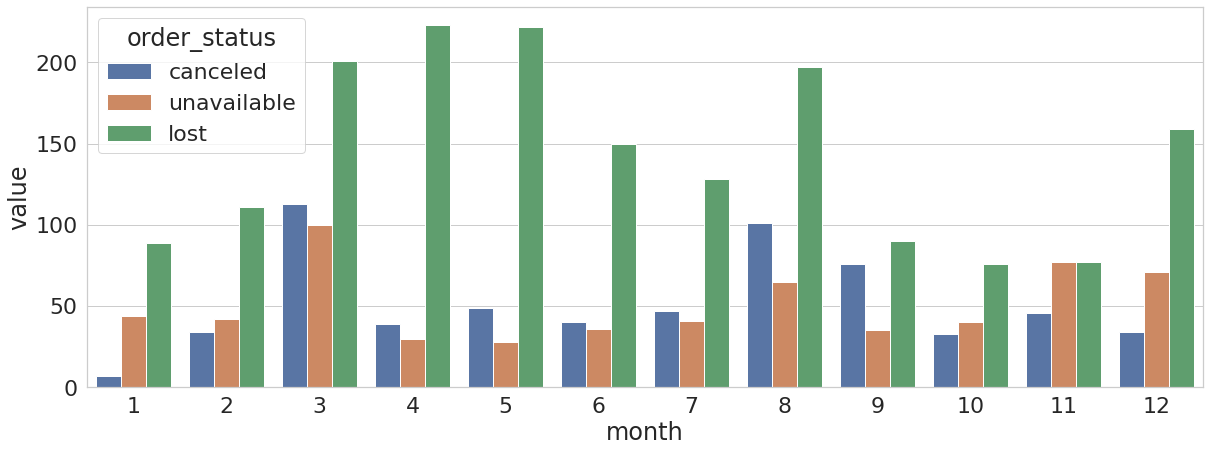

In [78]:
sns.barplot(data=orders_not_delivered_month_1, x='month', y='value', hue ='order_status')
# построение графика кол-ва недоставленных заказов в разрезе месяцев

### В итоге, 3 категории недоставленных заказов: среднее кол-во отмененных заказов в месяц - 52, среднее кол-во недоступных заказов в месяц - 51, среднее кол-во зависших заказов в месяц - 144

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [79]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [80]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [81]:
orders_approved = orders[orders.order_approved_at.notna()].query("order_status == 'delivered'")
# как решили ранее, совершить покупку: заказы, по которым есть информация об оплате и они доставлены

In [82]:
orders_approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [83]:
orders_approved['order_approved_at'] = pd.to_datetime(orders_approved['order_approved_at'])
# переводим колонку order_approved_at в формат даты

In [84]:
orders_approved['week'] = orders_approved['order_approved_at'].dt.day_name()
# добавляем колонку week - день недели совершения покупки

In [85]:
orders_approved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday


In [86]:
order_items_merge = order_items.merge(orders_approved, on='order_id')
# объединяем таблицу orders_approved c таблицей order_items, чтобы получить информацию о товаре

In [87]:
order_items_merge

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110177,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,Wednesday
110178,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,Tuesday
110179,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,Tuesday
110180,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,Tuesday


In [88]:
order_items_by_week = order_items_merge.groupby(['product_id', 'week'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns={'order_id':'count_orders'}) \
.sort_values('count_orders', ascending = False)
# группируем по товару и дню недели, считаем кол-во по каждому дню

In [89]:
order_items_by_week

,product_id,week,count_orders
40190,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19709,53b36df67ebb7c41585e8d54d6772e08,Tuesday,104
40185,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,92
15609,422879e10f46682990de24d770e7f83d,Tuesday,89
15604,422879e10f46682990de24d770e7f83d,Friday,87
...,...,...,...
23490,640fcadaeb5f06f26d6b07d366cebd34,Saturday,1
23491,6410668313e664e438837bf86363fcb9,Friday,1
23492,64118e924b5de8663f5cb1caad0abff8,Monday,1
23493,64123627d4116a2bc8284f1bc0a257f3,Saturday,1


In [90]:
order_items_by_week[order_items_by_week.product_id == '63f4d40c05db6ade462cecef857eec34']
# тест - кол-во покупок товара 63f4d40c05db6ade462cecef857eec34

,product_id,week,count_orders
23461,63f4d40c05db6ade462cecef857eec34,Thursday,2
23459,63f4d40c05db6ade462cecef857eec34,Friday,2
23460,63f4d40c05db6ade462cecef857eec34,Monday,1
23462,63f4d40c05db6ade462cecef857eec34,Wednesday,1


In [91]:
order_items_by_week_2 = order_items_by_week.groupby('product_id', as_index = False) \
.agg({'count_orders':'max'}) \
.sort_values('count_orders', ascending = False)
# группируем по товару и наибольшему кол-ву покупок

In [92]:
order_items_by_week_2

,product_id,count_orders
21615,aca2eb7d00ea1a7b8ebd4e68314663af,119
10614,53b36df67ebb7c41585e8d54d6772e08,104
8428,422879e10f46682990de24d770e7f83d,89
6925,368c6c730842d78016ad823897a372db,80
19288,99a4788cb24856965c36a24e339b6058,78
...,...,...
12448,628cfb8a45c95a7b796ea06b006e9384,1
12446,628b17449083fb34688b2959b80bdecd,1
12445,62892a47bea324c325a4556b66baef9d,1
12444,62874f62bbdeec35f7cd827b1716c47e,1


In [93]:
order_items_by_week_max = order_items_by_week.merge(order_items_by_week_2, on=['count_orders', 'product_id'], how='inner')
# объединяем таблицы, чтобы получить день недели, в который 
# приобретается наибольшее кол-во товара

#### по некоторым товарам несколько максимальных значений (покупается одинаковое кол-во раз), например: 63f4d40c05db6ade462cecef857eec34 - Friday:2, Thursday:2

In [94]:
order_items_by_week_max

,product_id,week,count_orders
0,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
1,53b36df67ebb7c41585e8d54d6772e08,Tuesday,104
2,422879e10f46682990de24d770e7f83d,Tuesday,89
3,368c6c730842d78016ad823897a372db,Thursday,80
4,99a4788cb24856965c36a24e339b6058,Tuesday,78
...,...,...,...
41612,640fcadaeb5f06f26d6b07d366cebd34,Saturday,1
41613,6410668313e664e438837bf86363fcb9,Friday,1
41614,64118e924b5de8663f5cb1caad0abff8,Monday,1
41615,64123627d4116a2bc8284f1bc0a257f3,Saturday,1


### Итоговый DataFrame с определением по каждому товару, в какой день недели товар чаще всего покупается

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [95]:
orders_approved = orders[orders.order_approved_at.notna()].query("order_status == 'delivered'")
orders_approved
# заказы у которых есть информация об оплате и они доставлены

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [96]:
orders_delivered['order_approved_at'] = pd.to_datetime(orders_delivered['order_approved_at'])
# order_approved_at переводим в формат даты

In [97]:
orders_delivered['Month'] = orders_delivered['order_approved_at'].dt.month_name()
# выводим в отдельную колонку название месяца оплаты

In [98]:
orders_delivered['Year'] = orders_delivered['order_approved_at'].dt.year
# выводим в отдельную колонку название года

In [99]:
orders_delivered["days_of_month"] = orders_delivered['order_approved_at'].dt.daysinmonth
# выводим в отдельную колонку кол-во дней в текущем месяце

In [100]:
orders_delivered['weeks_of_month'] = round(orders_delivered["days_of_month"] / 7, 2)
# находим кол-во недель в месяце

In [101]:
orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,days_of_month,weeks_of_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,October,2017,31,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,July,2018,31,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,August,2018,31,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,November,2017,30,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,February,2018,28,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,March,2017,31,4.43
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,February,2018,28,4.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,August,2017,31,4.43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,January,2018,31,4.43


In [102]:
customers_orders = customers.merge(orders_delivered, on='customer_id', how='inner')
# объединяем таблицы customers и orders_delivered

In [103]:
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,days_of_month,weeks_of_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,May,2017,31,4.43
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,January,2018,31,4.43
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,May,2018,31,4.43
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,March,2018,31,4.43
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,July,2018,31,4.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96459,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,April,2018,30,4.29
96460,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,April,2018,30,4.29
96461,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,April,2018,30,4.29
96462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,November,2017,30,4.29


In [104]:
customers_orders_2 = customers_orders.groupby(['customer_unique_id','Month', 'Year', 'weeks_of_month'], as_index=False) \
.agg({'customer_id':'count'}) \
.sort_values('customer_id', ascending = False) \
.rename(columns={'customer_id':'orders_month'})
# группируем и находим общее кол-во заказов у каждого пользвотеля по каждому месяцу(году)

In [105]:
customers_orders_2

,customer_unique_id,Month,Year,weeks_of_month,orders_month
7100,12f5d6e1cbf93dafd9dcc19095df0b3d,January,2017,4.43,6
65760,b08fab27d47a1eb6deda07bfd965ad43,September,2017,4.29,4
49119,83e7958a94bd7f74a9414d8782f87628,January,2017,4.43,4
67349,b4e4f24de1e8725b74e4a1f4975116ed,February,2018,4.00,4
23218,3e43e6105506432c953e165fb2acf44c,February,2018,4.00,4
...,...,...,...,...,...
31894,55a36fca00cebb9272a8e7d5b8325f59,May,2017,4.43,1
31893,55a34f9f352e3c1ef564fc7855a1b7e9,July,2018,4.43,1
31892,55a2d38a48216287f07c360037b1955b,February,2018,4.00,1
31891,55a2c780cc65e883981402b88dbd44d7,June,2017,4.29,1


In [106]:
customers_orders_2['avg_orders_of_week'] = customers_orders_2['orders_month'] / customers_orders_2['weeks_of_month']
# разделим общее кол-во заказов в месяц на кол-во недель в этом месяце, находим среднее кол-во заказов в неделю
# для каждого пользователя по месяцам

In [107]:
customers_orders_2

,customer_unique_id,Month,Year,weeks_of_month,orders_month,avg_orders_of_week
7100,12f5d6e1cbf93dafd9dcc19095df0b3d,January,2017,4.43,6,1.354402
65760,b08fab27d47a1eb6deda07bfd965ad43,September,2017,4.29,4,0.932401
49119,83e7958a94bd7f74a9414d8782f87628,January,2017,4.43,4,0.902935
67349,b4e4f24de1e8725b74e4a1f4975116ed,February,2018,4.00,4,1.000000
23218,3e43e6105506432c953e165fb2acf44c,February,2018,4.00,4,1.000000
...,...,...,...,...,...,...
31894,55a36fca00cebb9272a8e7d5b8325f59,May,2017,4.43,1,0.225734
31893,55a34f9f352e3c1ef564fc7855a1b7e9,July,2018,4.43,1,0.225734
31892,55a2d38a48216287f07c360037b1955b,February,2018,4.00,1,0.250000
31891,55a2c780cc65e883981402b88dbd44d7,June,2017,4.29,1,0.233100


In [108]:
customers_orders_2[customers_orders_2.customer_unique_id == '3e43e6105506432c953e165fb2acf44c']
# тест - мониторинг пользотеля '3e43e6105506432c953e165fb2acf44c', выводим средние кол-во его покупок в неделю (по месяцам)

,customer_unique_id,Month,Year,weeks_of_month,orders_month,avg_orders_of_week
23218,3e43e6105506432c953e165fb2acf44c,February,2018,4.00,4,1.000000
23217,3e43e6105506432c953e165fb2acf44c,December,2017,4.43,3,0.677201
23220,3e43e6105506432c953e165fb2acf44c,September,2017,4.29,1,0.233100
23219,3e43e6105506432c953e165fb2acf44c,January,2018,4.43,1,0.225734


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [109]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [110]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [111]:
orders_approved = orders[orders.order_approved_at.notna()]
# будем считать, пользователь совершил целевое действие - если произвел оплату

In [112]:
orders_approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [113]:
orders_customers = customers.merge(orders_approved, on='customer_id')
# объединяем DF чтобы получить информацию о пользователях

In [114]:
orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99276,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99277,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99278,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99279,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [115]:
orders_customers['order_approved_at'] = pd.to_datetime(orders_customers['order_approved_at'])
# переводим order_approved_at в формат даты

In [116]:
first_orders = orders_customers.groupby(['customer_unique_id'], as_index=False) \
.agg({'order_approved_at': 'min'}) \
.rename(columns={'order_approved_at':'first_orders'})
# находим даты первых покупок пользователей

In [117]:
first_orders

,customer_unique_id,first_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
95993,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
95994,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44
95995,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47


In [118]:
orders_merged = orders_customers.merge(first_orders, on='customer_unique_id')
# объединяем DF чтобы в общей таблице иметь даты первых покупок

In [119]:
orders_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29 10:10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99276,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04-07 16:08:45
99277,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04-04 08:35:12
99278,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04-08 20:30:03
99279,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11-03 21:31:20


In [120]:
orders_merged['year_firts_orders'] = orders_merged['first_orders'].dt.year
# выводим в отдельную колонку год первой покупки пользователя

In [121]:
orders_merged['month_firts_orders'] = orders_merged['first_orders'].dt.month
# выводим в отдельную колонку месяц первой покупки пользователя

In [122]:
orders_merged['month_approved'] = orders_merged['order_approved_at'].dt.month
# выводим в отдельную колонку месяц покупки пользователя (не обязательно)

In [123]:
orders_merged['year_approved'] = orders_merged['order_approved_at'].dt.year
# выводим в отдельную колонку год покупки пользователя (не обязательно)

In [124]:
orders_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_orders,year_firts_orders,month_firts_orders,month_approved,year_approved
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:22:12,2017,5,5,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12 20:58:32,2018,1,1,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-20 16:19:10,2018,5,5,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13 17:29:19,2018,3,3,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29 10:10:09,2018,7,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99276,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04-07 16:08:45,2018,4,4,2018
99277,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04-04 08:35:12,2018,4,4,2018
99278,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04-08 20:30:03,2018,4,4,2018
99279,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11-03 21:31:20,2017,11,11,2017


In [125]:
orders_merged = orders_merged.query('year_firts_orders == 2017')
# оставляем данные пользователей, совершивших первый заказ в 2017 году

In [126]:
orders_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_orders,year_firts_orders,month_firts_orders,month_approved,year_approved
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:22:12,2017,5,5,2017
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,2017-09-14 18:25:11,2017,9,9,2017
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,jaragua do sul,SC,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:13,2017-10-15 13:05:29,2017-10-17 20:05:34,2017-10-25 17:00:04,2017-11-08 00:00:00,2017-09-14 18:25:11,2017,9,10,2017
8,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2017-11-16 19:55:41,2017,11,11,2017
12,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,2017-11-27 18:01:20,2017,11,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99270,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,6727,cotia,SP,326c29ec5b89834b17aea7d85302fd70,delivered,2017-05-24 11:54:31,2017-05-25 02:50:25,2017-05-26 16:12:26,2017-06-02 14:12:38,2017-06-14 00:00:00,2017-05-25 02:50:25,2017,5,5,2017
99273,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA,ec3a75fb0ac595e461765d2d854b1d08,delivered,2017-03-15 21:04:08,2017-03-15 21:04:08,2017-03-20 08:34:12,2017-04-05 11:07:12,2017-04-26 00:00:00,2017-03-15 21:04:08,2017,3,3,2017
99275,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,2017-12-18 00:17:27,2017-12-20 18:52:08,2018-01-04 13:08:05,2018-01-23 00:00:00,2017-12-18 00:17:27,2017,12,12,2017
99279,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11-03 21:31:20,2017,11,11,2017


In [127]:
orders_merged['count_month_from_first'] = round(((orders_merged.order_approved_at - orders_merged.first_orders).dt.days) / 30)
# выводим в отдельную колонку кол-во месяцев прошедших от первой покупки дользователя до текущей покупки

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
orders_merged.sort_values('count_month_from_first', ascending = False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_orders,year_firts_orders,month_firts_orders,month_approved,year_approved,count_month_from_first
75131,554e72ada8751c515ab293a7605b530e,d8f3c4f441a9b59a29f977df16724f38,9720,sao bernardo do campo,SP,b2947cf9a8d3084369dfcbe9663dd545,delivered,2018-08-24 17:52:59,2018-08-25 04:05:18,2018-08-27 14:54:00,2018-08-30 19:38:28,2018-09-06 00:00:00,2017-01-19 21:10:20,2017,1,8,2018,19.0
12319,82e75091956ca96dc8d1325295733386,30b782a79466007756f170cb5bd6bbd8,5872,sao paulo,SP,8b6746478f6b44e7b76097d1c2f4dbe6,delivered,2018-07-30 22:09:45,2018-07-30 22:44:16,2018-07-31 19:50:00,2018-08-01 23:55:45,2018-08-07 00:00:00,2017-02-20 21:25:20,2017,2,7,2018,18.0
13931,b1bd82709d081818f2e3c31399ae5d68,8f6ce2295bdbec03cd50e34b4bd7ba0a,22230,rio de janeiro,RJ,720609547e1e3b8ac4b3dc47ba846525,delivered,2018-07-31 22:03:59,2018-07-31 22:40:26,2018-08-01 12:29:00,2018-08-06 20:03:25,2018-08-17 00:00:00,2017-02-09 13:11:15,2017,2,7,2018,18.0
54710,0881e1574aa6b621c551a421297af5b8,18bc87094128bbfe943cf88adcf72059,1238,sao paulo,SP,c94206a6d6698d5852b7e9e14bdc2e79,delivered,2018-06-25 12:06:07,2018-06-25 12:15:25,2018-06-28 13:57:00,2018-06-29 19:24:41,2018-07-05 00:00:00,2017-01-27 01:05:27,2017,1,6,2018,17.0
14239,9e36e87b2ed55c78b24bd7a4b58be3a0,7e7301841ddb4064c2f3a31e4c154932,24744,sao goncalo,RJ,2e8080693faebedb3ba68531167c6313,delivered,2018-07-14 19:38:26,2018-07-14 19:50:18,2018-07-16 15:10:00,2018-07-23 22:38:40,2018-08-03 00:00:00,2017-02-15 13:10:39,2017,2,7,2018,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33604,11f312ef72bdca82219eca082d2cff92,d24694c6a624cc659c7091930df961bd,36200,barbacena,MG,56e7dc50531017cea79acb3edf5a9173,delivered,2017-12-26 13:20:13,2017-12-27 04:10:41,2017-12-28 17:12:45,2018-01-05 18:22:18,2018-01-23 00:00:00,2017-12-27 04:10:41,2017,12,12,2017,0.0
33606,4a6e1c44e2055e46c2e15d69edb81be7,2d0c669e022d0eb2c7e8affa8851a688,11085,santos,SP,26a95c7a47327bed47c5651221bfcb18,delivered,2017-09-12 19:37:09,2017-09-12 19:50:24,2017-09-14 19:27:24,2017-10-06 16:55:33,2017-09-29 00:00:00,2017-09-12 19:50:24,2017,9,9,2017,0.0
33609,a5f4affe5051bdcfb83b5d94dd38fb07,ab8e23b541656451d44079e20347f571,88338,balneario camboriu,SC,b72e264e0ef8537587bdf783c377c3fc,delivered,2017-12-12 11:24:47,2017-12-12 12:48:48,2017-12-13 18:14:53,2018-01-03 13:46:58,2018-01-09 00:00:00,2017-12-12 12:48:48,2017,12,12,2017,0.0
33610,a373b0a9df3236a0bd069c9a01922713,76a8d1e8cb5038f4f0a171f16d63373a,8420,sao paulo,SP,1a867802edf4f74cef9de8cfe691e5f3,delivered,2017-10-02 12:34:59,2017-10-02 12:49:26,2017-10-03 19:04:23,2017-10-11 12:00:11,2017-10-27 00:00:00,2017-10-02 12:49:26,2017,10,10,2017,0.0


In [129]:
orders_merged_2017 = orders_merged.groupby(['month_firts_orders', 'count_month_from_first'], as_index=False) \
.agg({'customer_id': 'count'}) \
.rename(columns={'customer_id':'count_orders'}) \
.pivot(index='month_firts_orders', columns='count_month_from_first', values='count_orders')
# выводим когорты пользоватлей соверших первый заказ с января по декабрь 2017 г. (month_firts_orders)
# считаем кол-во дальнейших покупок этих пользоватлей по месяцам
# с помощью pivot разворачиваем в удобный вид

In [130]:
orders_merged_2017

count_month_from_first,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
month_firts_orders,,,,,,,,,,,,,,,,,,,,
1,762.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,3.0,4.0,3.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0
2,1761.0,5.0,3.0,2.0,8.0,1.0,6.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,3.0,1.0,1.0,3.0,2.0,NaN
3,2683.0,15.0,6.0,13.0,8.0,4.0,6.0,7.0,6.0,5.0,10.0,5.0,4.0,5.0,4.0,5.0,2.0,4.0,NaN,NaN
4,2356.0,15.0,4.0,5.0,5.0,8.0,8.0,5.0,9.0,5.0,5.0,3.0,1.0,2.0,1.0,1.0,7.0,NaN,NaN,NaN
5,3664.0,20.0,21.0,12.0,16.0,13.0,13.0,8.0,9.0,13.0,11.0,10.0,7.0,4.0,7.0,12.0,NaN,NaN,NaN,NaN
6,3207.0,11.0,16.0,11.0,10.0,6.0,14.0,10.0,4.0,10.0,7.0,10.0,5.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN
7,3921.0,17.0,12.0,11.0,9.0,13.0,10.0,6.0,7.0,9.0,9.0,11.0,6.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN
8,4283.0,23.0,22.0,13.0,15.0,21.0,13.0,10.0,7.0,8.0,7.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4220.0,27.0,25.0,14.0,21.0,11.0,8.0,10.0,14.0,9.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
orders_merged_2017['retention_3_month'] = round(((orders_merged_2017.iloc[0:12, 3] / orders_merged_2017.iloc[0:12, 0]) * 100), 2)
# среди всех когорт считаем retention на 3й месяц

In [132]:
orders_merged_2017

count_month_from_first,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,retention_3_month
month_firts_orders,,,,,,,,,,,,,,,,,,,,,
1,762.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,...,4.0,3.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0,0.26
2,1761.0,5.0,3.0,2.0,8.0,1.0,6.0,2.0,2.0,4.0,...,2.0,4.0,4.0,3.0,1.0,1.0,3.0,2.0,NaN,0.11
3,2683.0,15.0,6.0,13.0,8.0,4.0,6.0,7.0,6.0,5.0,...,5.0,4.0,5.0,4.0,5.0,2.0,4.0,NaN,NaN,0.48
4,2356.0,15.0,4.0,5.0,5.0,8.0,8.0,5.0,9.0,5.0,...,3.0,1.0,2.0,1.0,1.0,7.0,NaN,NaN,NaN,0.21
5,3664.0,20.0,21.0,12.0,16.0,13.0,13.0,8.0,9.0,13.0,...,10.0,7.0,4.0,7.0,12.0,NaN,NaN,NaN,NaN,0.33
6,3207.0,11.0,16.0,11.0,10.0,6.0,14.0,10.0,4.0,10.0,...,10.0,5.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,0.34
7,3921.0,17.0,12.0,11.0,9.0,13.0,10.0,6.0,7.0,9.0,...,11.0,6.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,0.28
8,4283.0,23.0,22.0,13.0,15.0,21.0,13.0,10.0,7.0,8.0,...,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30
9,4220.0,27.0,25.0,14.0,21.0,11.0,8.0,10.0,14.0,9.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33


In [133]:
orders_merged_2017.retention_3_month.idxmax()

3

### Итого, самый высокий retention на 3й месяц у когорты пользователей совершивших первую покупку в марте (3-й месяц) 2017 года - 0.48

# 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.  В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [134]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [135]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [136]:
orders_delivered = orders[orders.order_approved_at.notna()].query("order_status == 'delivered'")
# совершить покупку: заказ у которого есть информация об оплате и он доставлен.

In [137]:
orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [138]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [139]:
order_price = order_items.groupby('order_id').agg({'price':'sum'}).reset_index()
# создаем DF с order_id и ценой заказа

In [140]:
order_price

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [141]:
orders_delivered_price = orders_delivered.merge(order_price, on='order_id')
# объединяем DF

In [142]:
orders_delivered_price

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90
...,...,...,...,...,...,...,...,...,...
96459,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,72.00
96460,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,174.90
96461,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,205.99
96462,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,359.98


In [143]:
customers_orders_delivered_price = customers.merge(orders_delivered_price, on='customer_id')
# объединяем DF

In [144]:
customers_orders_delivered_price

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96459,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,74.90
96460,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,114.90
96461,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,37.00
96462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,689.00


In [145]:
customers_orders_delivered_price['order_approved_at'] = pd.to_datetime(customers_orders_delivered_price['order_approved_at'])
# переводим order_approved_at в формат даты

In [146]:
customers_orders_delivered_price['order_delivered_customer_date'] = pd.to_datetime(customers_orders_delivered_price['order_delivered_customer_date'])
# # переводим order_delivered_customer_date в формат даты

In [147]:
NOW = customers_orders_delivered_price['order_delivered_customer_date'].max()
# допустим текущая дата 2018-10-17

In [148]:
NOW

Timestamp('2018-10-17 13:22:46')

In [149]:
customers_orders_delivered_price['DaysSinceOrder'] = (NOW - customers_orders_delivered_price.order_approved_at).dt.days
# кол-во дней от покупки пользователя до текущей даты

In [150]:
customers_orders_delivered_price

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,DaysSinceOrder
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99,518
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00,277
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94,149
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94,217
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96459,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,74.90,192
96460,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,114.90,196
96461,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,37.00,191
96462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,689.00,347


In [151]:
RFM = customers_orders_delivered_price.groupby(['customer_unique_id'], as_index=False) \
.agg({'DaysSinceOrder':'min', 'customer_id': 'count', 'price':'sum'}) \
.rename(columns={'DaysSinceOrder':'Recency', 'customer_id':'Frequency','price':'Monetary'})
# группируем по пользователям, считаем  
# Recency - время от последней покупки пользователя до текущей даты, 
# Frequency - суммарное количество покупок у пользователя за всё время, Monetary - сумма покупок за всё время

In [152]:
RFM

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90
2,0000f46a3911fa3c0805444483337064,585,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00
...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89
93342,ffff371b4d645b6ecea244b27531430a,616,1,89.90
93343,ffff5962728ec6157033ef9805bacc48,167,1,115.00


In [153]:
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
# для сегментации значения делим данные по квантелям

In [154]:
quintiles
# значение данных на основе которых производим сегментацию

{'Recency': {0.2: 140.0, 0.4: 225.0, 0.6: 316.0, 0.8: 429.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [155]:
RFM.value_counts('Frequency')

Frequency
1     90545
2      2572
3       181
4        28
5         9
6         5
7         3
15        1
9         1
dtype: int64

In [156]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5   
    
def f_score(x):
    if x == 1:
        return 1
    else:
        return 5
# создаем функции для присвоения необходимого ранга
# Чем меньше Recency тем лучше, поэтому ранги расположены по убыванию
# Monetary наоборот, чем больше тем лучше, поэтому ранги расположены по возрастанию
# ранги по Recency и Monetary присваиваются на основе квантилей,
# Frequency же распределено неравномерно, большенство пользователей делает 1 покупку
# поэтому ранги по Frequency сегментируем вручную, на основе анализа кол-ва покупок

In [157]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: m_score(x, 'Monetary'))
# применяем функции к нашим данным

In [158]:
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
# в колонку RFM_Score выводим итоговый ранг пользователя

In [159]:
RFM

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,585,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,2,1,5,215
...,...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,1570.00,1,1,5,115
93341,fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89,3,1,2,312
93342,ffff371b4d645b6ecea244b27531430a,616,1,89.90,1,1,3,113
93343,ffff5962728ec6157033ef9805bacc48,167,1,115.00,4,1,4,414


In [160]:
segt_map = {
    r'[4-5][4-5]': 'Активный крупный покупатель',
    r'[4-5][1-2]': 'Активный бюджетный покупатель',
    r'[4-5]3': 'Активный средний покупатель',
    r'3[1-2]': 'Не активный бюджетный покупатель',
    r'3[4-5]': 'Не активный крупный покупатель',
    r'[1-2][1-2]': 'Потерявшийся бюджетный покупатель',
    r'[1-2][4-5]': 'Потерявшийся крупный покупатель',
    r'[1-2]3': 'Потерявшийся средний покупатель',
    r'33': 'Не активный средний покупатель'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['M'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head(50)

# Активные крупные покупатели - недавно делали покупку, большая сумма покупок
# Активные бюджетные покупатели - недавно делали покупки, небольшая сумма покупок
# Активные средние покупатели - недавно делали покупку, средняя сумма покупок (от 69.9 до 109.9$) 
# Не активные бюджетные покупатели - достаточно давно (225-316 дней) делали покупку, небольшая сумма покупок
# Не активные крупные покупатели - достаточно давно (225-316 дней) делали покупку, большая сумма покупок
# Потерявшиеся бюджетные покутели - покупали давно, небольшая сумма покупок
# Потерявшиеся крупные покупатели - покупали давно, большая сумма покупок
# Потерявшиеся средние покупатели - делали покупку давно, средняя сумма покупок (от 69.9 до 109.9$)
# Не активные средние покупатели - покупали достаточно давно (225-316 дней), средняя сумма покупок (от 69.9 до 109.9$)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,4,1,4,414,Активный крупный покупатель
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,4,1,1,411,Активный бюджетный покупатель
2,0000f46a3911fa3c0805444483337064,585,1,69.00,1,1,2,112,Потерявшийся бюджетный покупатель
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,2,1,1,211,Потерявшийся бюджетный покупатель
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,2,1,5,215,Потерявшийся крупный покупатель
5,0004bd2a26a76fe21f786e4fbd80607f,194,1,154.00,4,1,4,414,Активный крупный покупатель
6,00050ab1314c0e55a6ca13cf7181fecf,175,1,27.99,4,1,1,411,Активный бюджетный покупатель
7,00053a61a98854899e70ed204dd4bafe,231,1,382.00,3,1,5,315,Не активный крупный покупатель
8,0005e1862207bf6ccc02e4228effd9a0,591,1,135.00,1,1,4,114,Потерявшийся крупный покупатель
9,0005ef4cd20d2893f0d9fbd94d3c0d97,218,1,104.90,4,1,3,413,Активный средний покупатель


In [161]:
RFM_1 = RFM.groupby('Segment', as_index=False).agg({'RFM_Score':'count'}) \
.rename(columns={'RFM_Score':'count_segment'}) \
.sort_values('count_segment', ascending=False)
# группируем считаем кол-во пользователей по сегментам

In [162]:
RFM_1

,Segment,count_segment
6,Потерявшийся бюджетный покупатель,15751
1,Активный крупный покупатель,15453
0,Активный бюджетный покупатель,15211
7,Потерявшийся крупный покупатель,14248
3,Не активный бюджетный покупатель,7806
4,Не активный крупный покупатель,7429
8,Потерявшийся средний покупатель,6947
2,Активный средний покупатель,6933
5,Не активный средний покупатель,3567


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

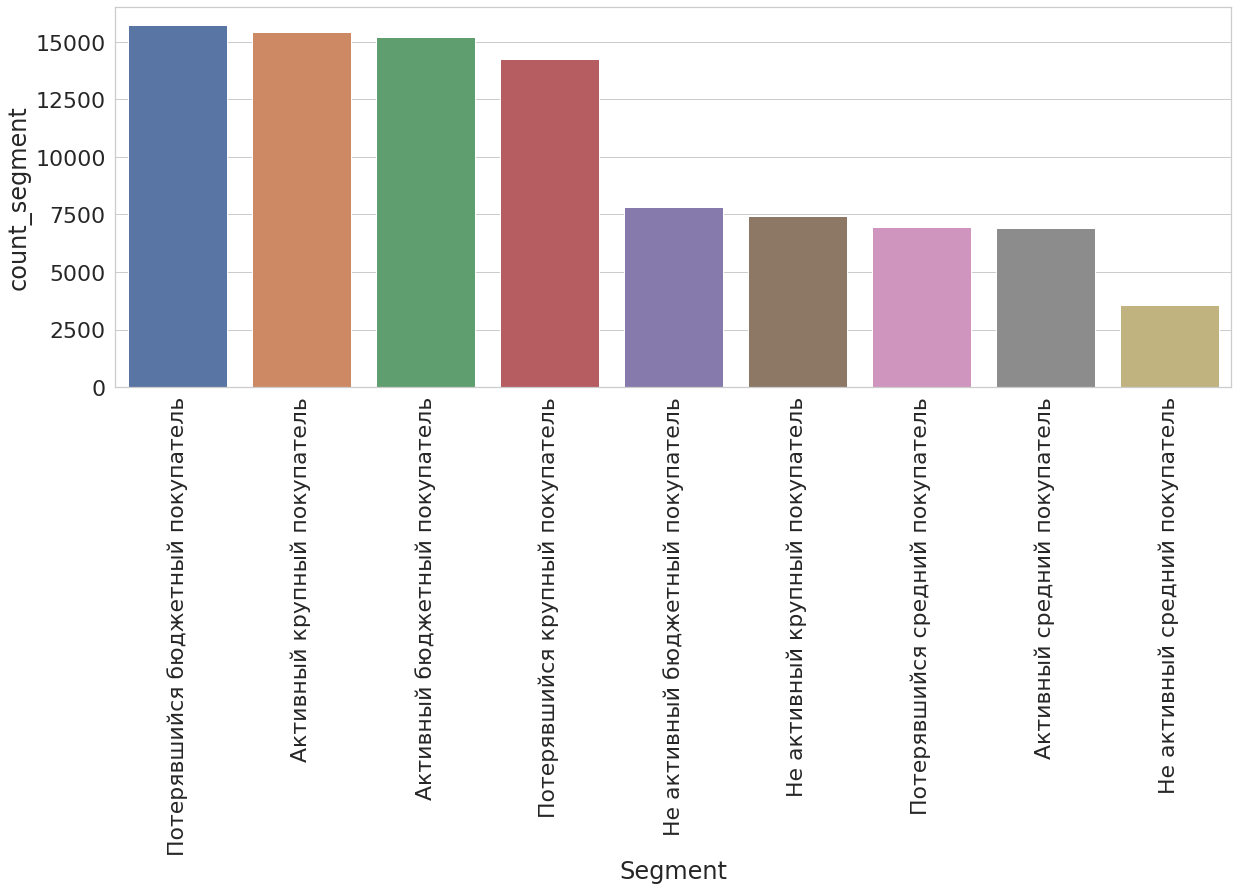

In [163]:
sns.barplot(data=RFM_1, x='Segment', y='count_segment')
plt.xticks(rotation=90)
# строим график